<Axes: xlabel='x1', ylabel='x2'>

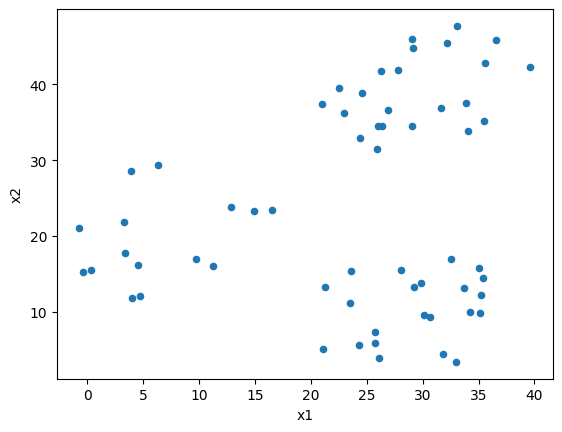

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("kmeans - kmeans_blobs.csv")
# print(df.iloc[:,1])
df.plot.scatter(x='x1', y='x2')

In [2]:
X = df.iloc[:, 0:2].values
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
print(X[:5, :])

[[0.62245151 0.66665161]
 [0.88977628 0.19821142]
 [0.6689816  0.86506628]
 [0.02629099 0.2731194 ]
 [0.66471551 0.01244326]]


In [ ]:
X.shape[0]
import numpy as np



For k value : 2
Center [[0.62245151 0.66665161]
 [0.65918448 0.63465143]]
Cluster : [0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


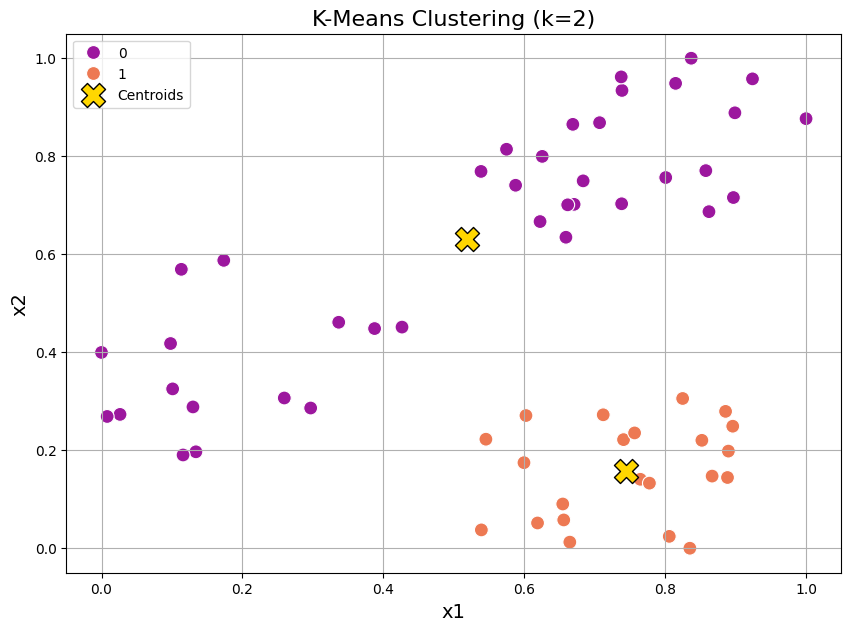

For k value : 3
Center [[0.62245151 0.66665161]
 [0.65918448 0.63465143]
 [0.68361526 0.74968948]]
Cluster : [2 1 2 0 1 2 1 1 2 2 2 2 2 1 0 0 1 1 0 2 0 1 0 2 0 1 0 2 0 2 1 1 1 2 0 1 2
 2 2 0 1 2 0 0 1 2 1 1 2 1 0 1 0 2 2 1 2 2 1 1]


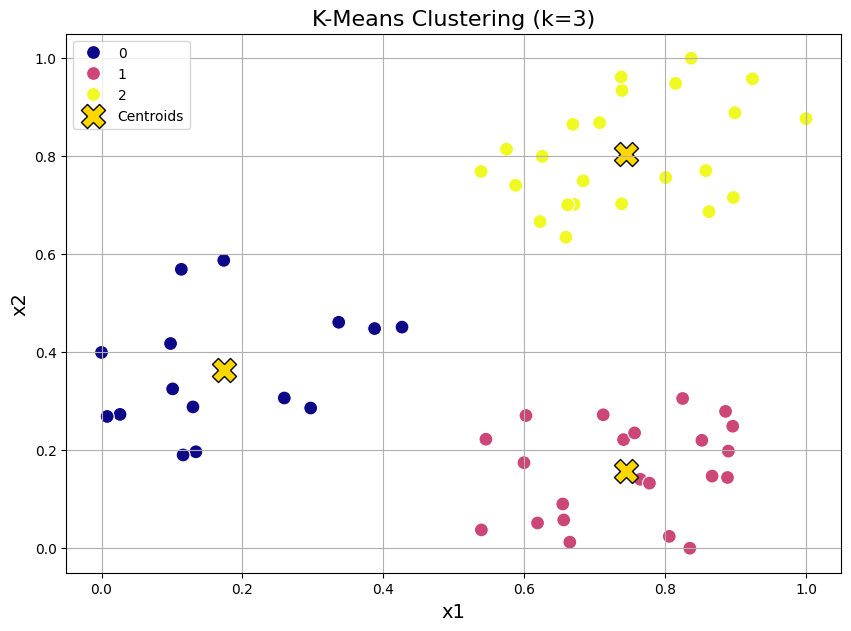

In [4]:
for k in [2,3]:
    print(f"For k value : {k}",end="\n")
    np.random.seed(42)
    centers = X[np.random.choice(X.shape[0],k,replace= False)]
    print(f"Center {centers}")
    for _ in range(100):
        diff = X[:, np.newaxis]-centers
        distance = np.linalg.norm(diff,axis=2)
        labels = np.argmin(distance,axis = 1)
        newCenters = []

        for i in range(k):
            points = X[labels == i]
            newPoints = points.mean(axis=0)
            newCenters.append(newPoints)
        newCenters = np.array(newCenters)
        if np.all(centers == newCenters):
            break
        centers = newCenters
    # print(newCenters)
    # print(centers)

    print(f"Cluster : {labels}")



    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=X[:, 0], y=X[:, 1],hue = labels, palette="plasma", s=100)
    plt.scatter(centers[:, 0], centers[:, 1], c='gold', marker='X', s=300, label='Centroids', edgecolor='black')
    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    plt.title(f'K-Means Clustering (k={k})', fontsize=16)
    plt.legend()
    plt.grid()
    plt.show()
